In [1]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data

    
# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('MI_PRIMER_DATAFRAME.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('19_MFCCS_DATAFRAME.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('VISUALIZATION_TASKS_DATAFRAME.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('visualization_features_var.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('var_mean_dict.csv', encoding='latin-1', thousands=',')

print(features.head(5))

print('done')

   Unnamed: 0  Genre  Energy_Mean  RMSE_Mean  ZCR_Mean  \
0           0  Blues    40.490492   0.130192     55050   
1           1  Blues    23.686239   0.095925     37156   
2           2  Blues    68.631996   0.175582     50560   
3           3  Blues    53.671735   0.141053     22060   
4           4  Blues    21.844622   0.091499     67244   

                                          CQT_Mean  Spectral_Contrast_Mean  \
0    (-0.0012633928232617323-0.00093755409438368j)               20.526699   
1    (0.002765901093404579+0.0028058299882665603j)               20.676128   
2    (-0.0043201854638925995-0.00651102129925984j)               22.197517   
3    (0.0028820339570055408-0.002197876579498383j)               21.426268   
4  (-0.0013302145878237744-0.0014331419392952839j)               21.466338   

   Chromagram_Mean  Tempo_Mean  \
0         0.278385  123.046875   
1         0.266356  107.666016   
2         0.272697  161.499023   
3         0.252442  172.265625   
4         0.

In [53]:
# Data proccess methods

def replace_char_list(array_list, old_str, new_str):
    """
    Method that replace a str for all the elements of a list
    """
    row_processed = []
    for x in array_list:
        row_processed.append(x.replace(old_str, new_str))
    return row_processed

def string_list_to_float_list(array_list):
    """
    Method that implements the process of convert a stringList of a pandas dataframe in a floats numpy array
    """
    
    array_list = replace_char(array_list, '[', '')
    array_list = replace_char(array_list, ']', '')
    array_list = replace_char(array_list, '...', '')
    
    column_processed = []
    
    for i in range(0, len(array_list)):
        splited = array_list[i].split()
        float_array = np.asarray(splited).astype(np.float)
        column_processed.append(float_array)
    return column_processed

['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']


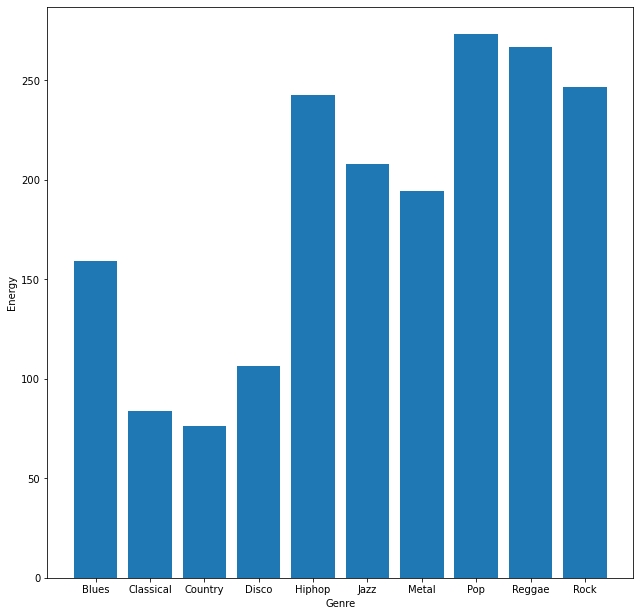

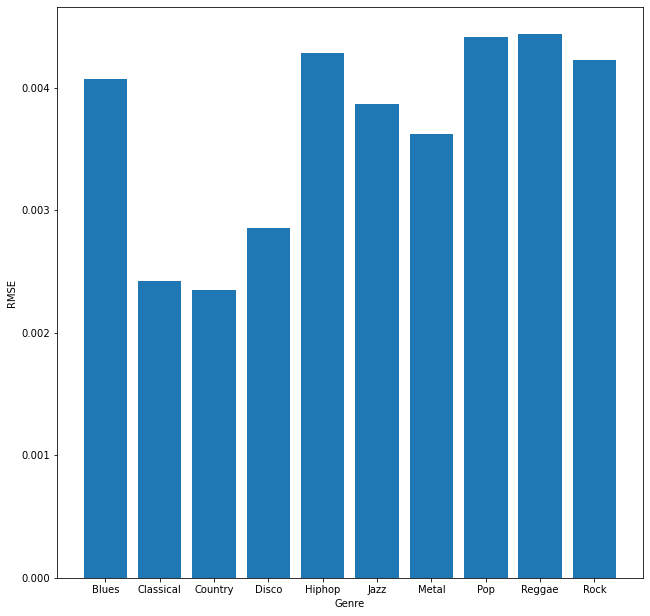

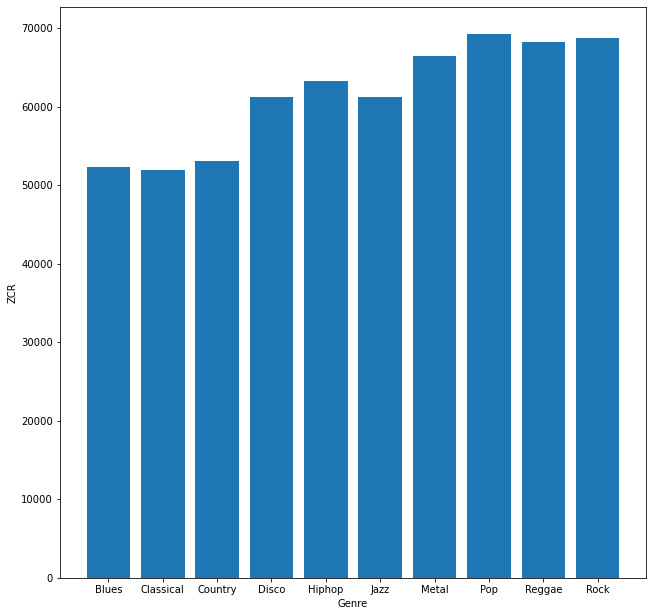

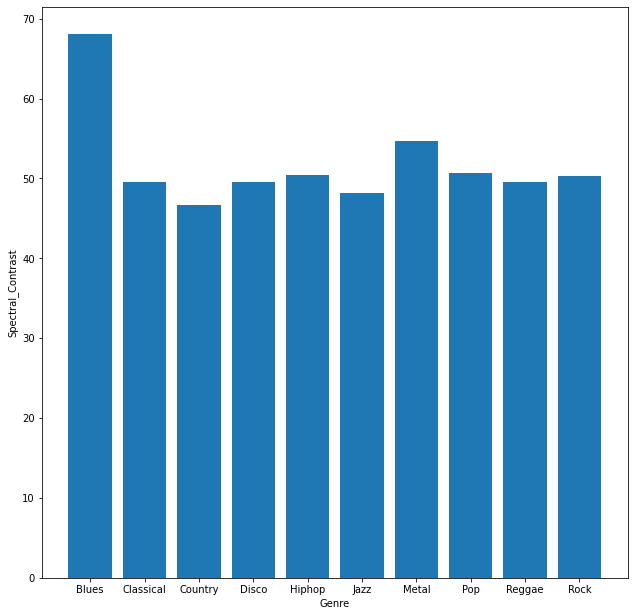

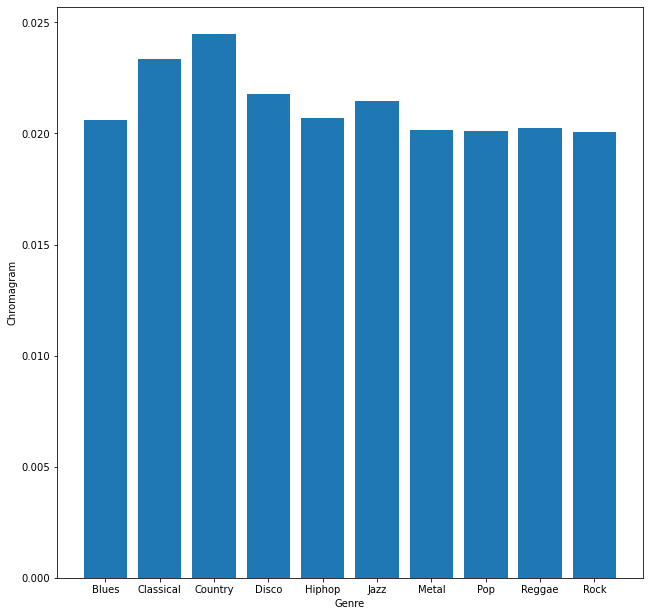

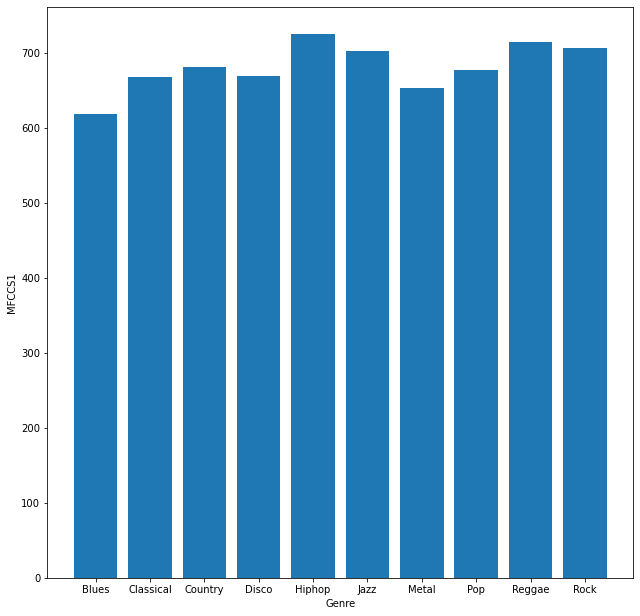

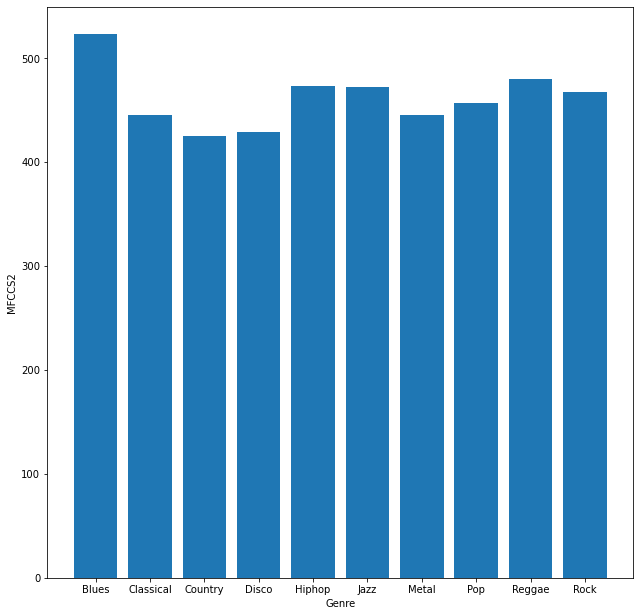

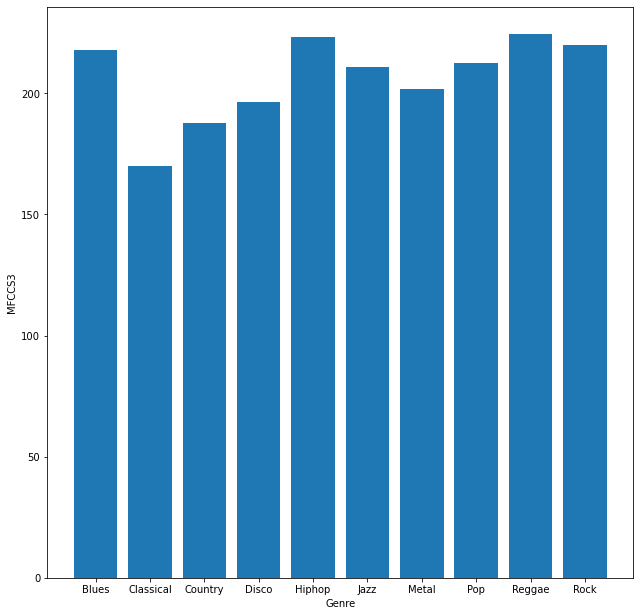

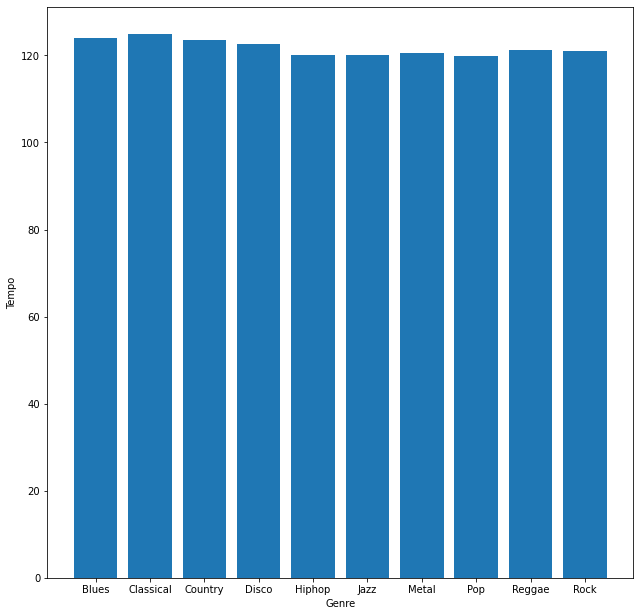

In [9]:
label = 'Genre'
labels = features[label]

print(np.unique(features[label]))

def float_cell_list_to_float_cell_mean (numpy_array_list):
    """
    Convert a columns which cell values are float lists to a column which cell values are the mean of this float lists
    """
    
    column_processed = []
    
    for i in range(0, len(numpy_array_list)):
        cell_mean = numpy_array_list[i].mean()
        column_processed.append(cell_mean)
    return column_processed

def featureMeanBarPlotMaker (features, label_tag, feature_tag, number_features_by_label):
    """
    Method that draw a barPlot of the mean of the given feature against the given label of a given pandas dataframe
    this method is only usefull if the number of feature by label is constant
    
    features: pandas dataframe
    label_tag: string identifying label
    feature_tag: string identifying feature
    number_features_by_label: number of features for label
    """
    
    features_means = []
    unique_labels = np.unique(features[label_tag])
    for i in range(1, len(unique_labels)+1):
#         features_mean = features[feature_tag][:i*number_features_by_label].mean()
        features_mean = features[feature_tag][:i*number_features_by_label].mean()
        features_means.append(features_mean)
    
    plt.bar(unique_labels, features_means)
    plt.xlabel(label_tag)
    plt.ylabel(feature_tag)
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    plt.show()
    
    
    
number_features_label = 100

featureMeanBarPlotMaker(features, label, 'Energy', number_features_label)
featureMeanBarPlotMaker(features, label, 'RMSE', number_features_label)
featureMeanBarPlotMaker(features, label, 'ZCR', number_features_label)
featureMeanBarPlotMaker(features, label, 'Spectral_Contrast', number_features_label)
featureMeanBarPlotMaker(features, label, 'Chromagram', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS1', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS2', number_features_label)
featureMeanBarPlotMaker(features, label, 'MFCCS3', number_features_label)
featureMeanBarPlotMaker(features, label, 'Tempo', number_features_label)

In [8]:
def replace_char(array_list, old_str, new_str):
    row_processed = []
    for x in array_list:
        row_processed.append(x.replace(old_str, new_str))
    return row_processed

def string_list_to_float_list(array_list):
    array_list = replace_char(array_list, '[[', '')
    array_list = replace_char(array_list, ']]', '')
    array_list = replace_char(array_list, '...', '')
    
    splited = array_list[0].split()
    print(splited)
    float_array = np.asarray(splited).astype(np.float)
    return float_array
    
array = string_list_to_float_list(features['Spectral_Contrast'])

print(array.mean())

['16.28331627', '8.52744961', '14.04482159', '8.71978953', '19.31062631', '8.69478577]', '[18.04367938', '13.97905461', '11.47699751', '15.51899916', '12.80766634', '9.60568721]', '[18.66737715', '11.70397725', '12.68180535', '16.83401631', '14.48563749', '10.94883358]', '[25.50130315', '21.11485352', '21.34808186', '19.81658966', '16.96708034', '16.20967626]', '[26.39957064', '15.67066725', '13.04148532', '18.08097225', '17.5444808', '14.475161', ']', '[24.67231637', '22.73101352', '37.28092353', '37.72795104', '28.20076739', '21.02940861']


ValueError: could not convert string to float: '8.69478577]'